Sebastian Yepes Acevedo

Cc:1007448816

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
digits = load_digits()
print(digits.data.shape)

X = digits.data
y = digits.target

(1797, 64)


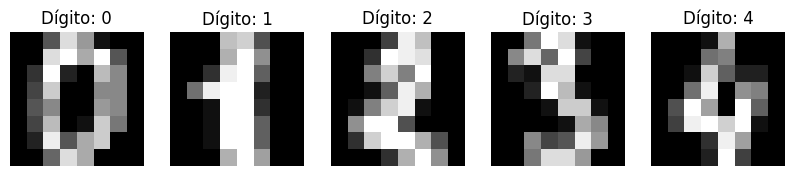

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images[:5], digits.target[:5]):
    ax.imshow(image, cmap="gray")
    ax.set_title(f"Dígito: {label}")
    ax.axis("off")
plt.show()


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

Dividimos el dataset en las variables de entrenamiento y las de prueba. Además de manetener la proporción de las clases con "Stratify". Luego, se crea el random forest y se procede con el entrenamiento.

In [8]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        45
           1       0.93      0.93      0.93        46
           2       1.00      0.98      0.99        44
           3       0.94      1.00      0.97        46
           4       0.96      1.00      0.98        45
           5       0.98      0.96      0.97        46
           6       1.00      0.98      0.99        45
           7       0.94      1.00      0.97        45
           8       0.95      0.86      0.90        43
           9       0.93      0.93      0.93        45

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



Obtenemos las predicciones con una presición del 96%, además de cómo se comportó la clasificación con la presición, cómo se reconocen los digitos reales (Recall) y el equilibrio entre ambas(F1-score).


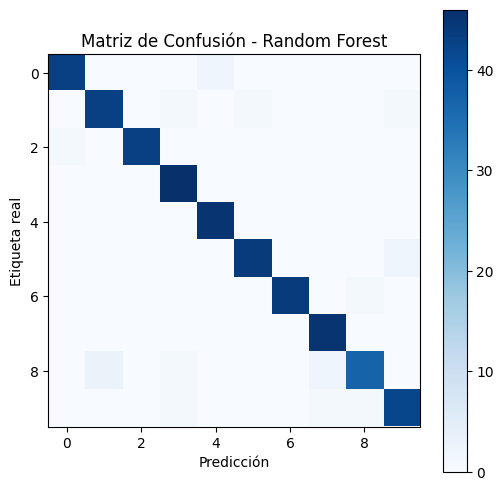

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
plt.imshow(cm, cmap="Blues")
plt.colorbar()
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()


De la matriz de confusión podemos observar que el programa reconoció en la mayoría de veces los números de forma correcta, con equivocaciones mínimas, siendo el 8, el dígito con más desaciertos según la gráfica.